In the lab below I try my own loss functions, optimizers, and model architectures to see what works best for the housing dataset regression problem

# Setup

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

#import keras functions and objects
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

2.7.0


# Load data

In [ ]:
#firft load the dataset into training data and labels and testing data and labels
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [ ]:
#normalize the data
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std

# Data visualization and Analysis

In [ ]:
#create training and testing dataframes
training_data = pd.DataFrame(train_features)
training_data['label'] = train_labels

testing_data = pd.DataFrame(test_features)
testing_data['label'] = test_labels

In [ ]:
#see the actual data to see that it has been normalized
training_data.head()

In [ ]:
# #get information from training data
# training_data.describe()

# Baseline Model

In [ ]:
#build a NN model with 1 hidden layer with 20 nodes, using ReLu activation function


def create_model(hidden_layers, hidden_nodes, model_loss = 'mean_squared_error', model_optimizer = 'adam'):
  #create model
  model = Sequential() 

  #add 1st hidden layer
  model.add(Dense(hidden_nodes, input_dim=13, kernel_initializer='normal', activation='relu'))
  
  #add more hidden layers
  for n in range(hidden_layers - 1):
    model.add(Dense(hidden_nodes, kernel_initializer='normal', activation='relu'))

  #add output layer
  model.add(Dense(1, kernel_initializer='normal'))    

  #compile model
  model.compile(optimizer= model_optimizer, loss = model_loss, metrics=['mae', 'mse'])

  return model

In [ ]:
# class to show epoch progress
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')


In [ ]:
#create the model with 1 hidden layer, 20 nodes, using mse loss, and adam optimizer
model = create_model(1, 20, 'mse', 'adam')


early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show Root Mean Squared Error
rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...........................................................
Final Root Mean Square Error on validation set: 2.404


In [ ]:
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
854,7.121012,1.883085,7.121012,5.893173,2.043676,5.893173,854
855,7.121472,1.882199,7.121472,5.951906,2.046128,5.951906,855
856,7.110910,1.881136,7.110910,5.855222,2.035338,5.855222,856
857,7.123304,1.877774,7.123304,5.919955,2.046549,5.919955,857
858,7.112015,1.885494,7.112015,5.777164,2.020877,5.777164,858


Plot of the loss function measure (Mean Square Error) on the training and validation sets

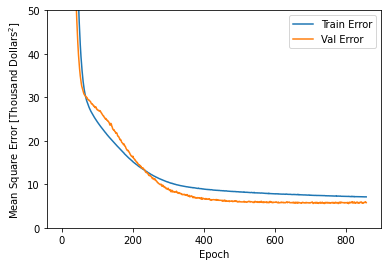

In [ ]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,50])

plot_history()

Model performance on the test dataset:

In [ ]:
#normalize test data
test_features_norm = (test_features - train_mean) / train_std

mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)

print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

4/4 [==============================] - 0s 5ms/step - loss: 17.8926 - mae: 2.6802 - mse: 17.8926
Root Mean Square Error on test set: 4.23


**The baseline model to beat:**

**Test RMSE = 4.23**

# Changing Model Architecture

## 2 hidden layers 

In [ ]:
#create the model with 1 hidden layer, 20 nodes, using mse loss, and adam optimizer
model = create_model(2, 20, 'mse', 'adam')


early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show Root Mean Squared Error
rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


....................................................................................................
....................................................................................................
....................................................................................................
...............................................................
Final Root Mean Square Error on validation set: 2.46


Plot of the loss function measure (Mean Square Error) on the training and validation sets

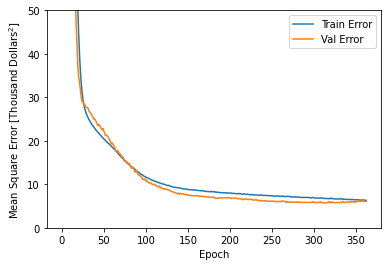

In [ ]:
plot_history()

Next, compare how the model performs on the test dataset:

In [ ]:
#normalize test data
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

4/4 [==============================] - 0s 4ms/step - loss: 15.6784 - mae: 2.5974 - mse: 15.6784
Root Mean Square Error on test set: 3.96


**So this outperformed the baseline model with only 1 hidden layer**

**Test RMSE = 3.96**

## 20 hidden layers 

In [ ]:
#create the model with 1 hidden layer, 20 nodes, using mse loss, and adam optimizer
model = create_model(20, 20, 'mse', 'adam')


early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show Root Mean Squared Error
rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


....................................................................................................
....................................................................................................
................................................................
Final Root Mean Square Error on validation set: 2.437


Plot of the loss function measure (Mean Square Error) on the training and validation sets

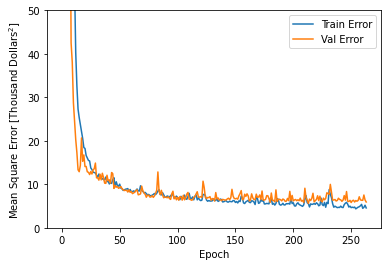

In [ ]:
plot_history()

model performance on the test dataset:

In [ ]:
#normalize test data
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

4/4 [==============================] - 0s 5ms/step - loss: 16.2418 - mae: 2.6769 - mse: 16.2418
Root Mean Square Error on test set: 4.03


**So this was worse than when there were only 2 hidden layers**

**Test RMSE = 4.03**

## 5 nodes in hidden layers 

In [ ]:
#create the model with 1 hidden layer, 20 nodes, using mse loss, and adam optimizer
model = create_model(1, 5, 'mse', 'adam')


early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show Root Mean Squared Error
rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.........
Final Root Mean Square Error on validation set: 3.112


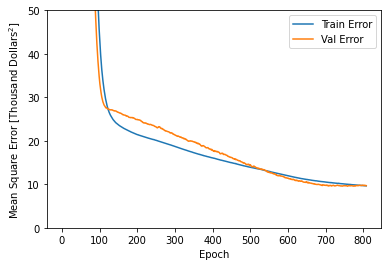

In [ ]:
plot_history()

Next, compare how the model performs on the test dataset:

In [ ]:
#normalize test data
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

4/4 [==============================] - 0s 5ms/step - loss: 19.4144 - mae: 2.9223 - mse: 19.4144
Root Mean Square Error on test set: 4.406


**Didn't beat the baseline model**

**Test RMSE = 4.406**

## 100 nodes in hidden layer

In [ ]:
#create the model with 1 hidden layer, 20 nodes, using mse loss, and adam optimizer
model = create_model(1, 100, 'mse', 'adam')


early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show Root Mean Squared Error
rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...................................
Final Root Mean Square Error on validation set: 2.277


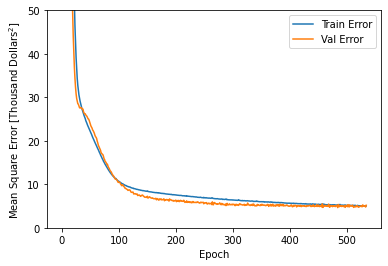

In [ ]:
plot_history()

Next, compare how the model performs on the test dataset:

In [ ]:
#normalize test data
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

4/4 [==============================] - 0s 4ms/step - loss: 14.3665 - mae: 2.4413 - mse: 14.3665
Root Mean Square Error on test set: 3.79


**This did better than the baseline, so may want to use more nodes, and more (but moderate) number of hidden layers**

**Test RMSE = 3.79**

# Changing Model Optimizer Function

## Stochastic Gradient Descent

In [ ]:
#create the model with 1 hidden layer, 20 nodes, using mse loss, and adam optimizer
model = create_model(1, 20, 'mse', 'sgd')


early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show Root Mean Squared Error
rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


....................................................................................................
....................................................................................................
.......................
Final Root Mean Square Error on validation set: 2.148


Now, let's plot the loss function measure on the training and validation sets. The validation set is used to prevent overfitting ([learn more about it here](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)). However, because our network is small, the training convergence without noticeably overfitting the data as the plot shows.

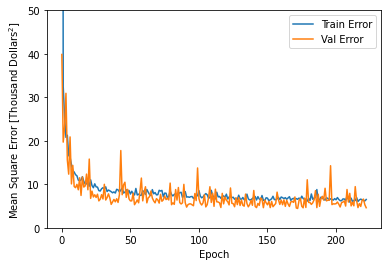

In [ ]:
plot_history()

Next, compare how the model performs on the test dataset:

In [ ]:
#normalize test data
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

4/4 [==============================] - 0s 4ms/step - loss: 18.4152 - mae: 2.6979 - mse: 18.4152
Root Mean Square Error on test set: 4.291


**This did worse than when using the Adam Optimizer**

## RMSProp

In [ ]:
#create the model with 1 hidden layer, 20 nodes, using mse loss, and adam optimizer
model = create_model(1, 20, 'mse', 'RMSprop')


early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show Root Mean Squared Error
rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...........................................................
Final Root Mean Square Error on validation set: 2.545


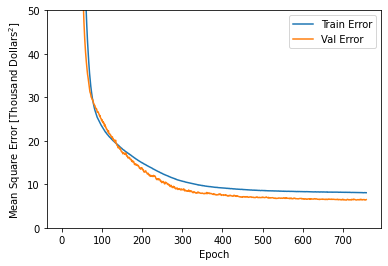

In [ ]:
plot_history()

Next, compare how the model performs on the test dataset:

In [ ]:
#normalize test data
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

4/4 [==============================] - 0s 4ms/step - loss: 19.5825 - mae: 2.7845 - mse: 19.5825
Root Mean Square Error on test set: 4.425


**This did worse than the Adam Optimizer**

## Adamax

In [ ]:
#create the model with 1 hidden layer, 20 nodes, using mse loss, and adam optimizer
model = create_model(1, 20, 'mse', 'Adamax')


early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show Root Mean Squared Error
rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

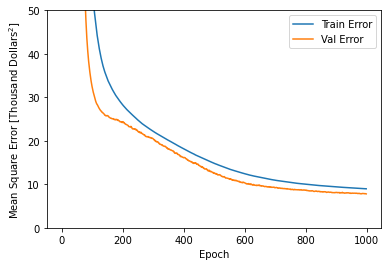

In [ ]:
plot_history()

Next, compare how the model performs on the test dataset:

In [ ]:
#normalize test data
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

4/4 [==============================] - 0s 4ms/step - loss: 22.2232 - mae: 2.9111 - mse: 22.2232
Root Mean Square Error on test set: 4.714


**This did worse than the Adam Optimizer**

# Changing Model Loss Function

## Mean absolute error

In [ ]:
#create the model with 1 hidden layer, 20 nodes, using mse loss, and adam optimizer
model = create_model(1, 20, 'mean_absolute_error', 'adam')


early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show Root Mean Squared Error
rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.................................................................................................
Final Root Mean Square Error on validation set: 2.362


In [ ]:
plot_history()

Next, compare how the model performs on the test dataset:

In [ ]:
#normalize test data
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

102/102 [==============================] - 0s 44us/step
Root Mean Square Error on test set: 4.244


**This did slightly worse than using the Mean Squared Error**

## Mean Absolute Percentage Error

In [ ]:
#create the model with 1 hidden layer, 20 nodes, using mse loss, and adam optimizer
model = create_model(1, 20, 'mean_absolute_percentage_error', 'adam')


early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show Root Mean Squared Error
rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..............................
Final Root Mean Square Error on validation set: 2.298


KeyError: ignored

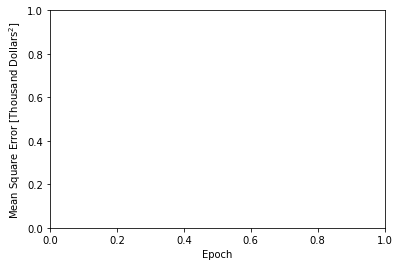

In [ ]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,50])

plot_history()

Next, compare how the model performs on the test dataset:

In [ ]:
#normalize test data
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

**This did slightlyt worse than using the Mean Squared Error**

## Mean squared logarithmic error

In [ ]:
#create the model with 1 hidden layer, 20 nodes, using mse loss, and adam optimizer
model = create_model(1, 20, 'mean_squared_logarithmic_error', 'adam')


early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show Root Mean Squared Error
rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))

In [ ]:
plot_history()

Next, compare how the model performs on the test dataset:

In [ ]:
#normalize test data
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

**This did slightlyt worse than using the Mean Squared Error**

# Takeaways


it seems as though the adam optimizer and mse loss functions were best for this specific problem. Additionally, one may want to use more nodes, and more (but moderate) number of hidden layers to optimize their model.
